In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [39]:
from keras.preprocessing.image import ImageDataGenerator

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [32]:
from sklearn.model_selection import train_test_split

In [36]:
datagen = ImageDataGenerator(validation_split=0.3)

In [37]:
train_data = datagen.flow_from_directory(directory = 'D:/mnist/trainingSet/trainingSet',target_size=(28,28),subset = 'training')

Found 29404 images belonging to 10 classes.


In [38]:
val_data = datagen.flow_from_directory(directory = 'D:/mnist/trainingSet/trainingSet',target_size=(28,28),subset = 'validation')

Found 12596 images belonging to 10 classes.


In [42]:
model = Sequential()

In [44]:
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [55]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [48]:
from keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor='val_loss',patience = 5,mode = 'min')

In [51]:
type(train_data)

keras.preprocessing.image.DirectoryIterator

In [59]:
model.fit_generator(train_data,epochs=10,verbose=1,validation_data=val_data)
model.save('my_model.h5')

Epoch 1/10
919/919 [==============================] - 648s 705ms/step - loss: 1.0682 - val_loss: 0.0111
Epoch 2/10
919/919 [==============================] - 5560s 6s/step - loss: 0.2240 - val_loss: 0.0674
Epoch 3/10
919/919 [==============================] - 691s 752ms/step - loss: 0.1666 - val_loss: 0.0552
Epoch 4/10
919/919 [==============================] - 709s 772ms/step - loss: 0.1442 - val_loss: 0.0018
Epoch 5/10
919/919 [==============================] - 2716s 3s/step - loss: 0.1246 - val_loss: 2.9237e-04
Epoch 6/10
919/919 [==============================] - 700s 762ms/step - loss: 0.1164 - val_loss: 4.7818e-04
Epoch 7/10
919/919 [==============================] - 682s 742ms/step - loss: 0.1080 - val_loss: 0.0302
Epoch 8/10
919/919 [==============================] - 683s 743ms/step - loss: 0.0929 - val_loss: 5.0294e-04
Epoch 9/10
919/919 [==============================] - 680s 739ms/step - loss: 0.0907 - val_loss: 0.0252
Epoch 10/10
919/919 [==============================] - 6

In [63]:
losses = model.history.history

In [69]:
losses

{'val_loss': [0.011120976880192757,
  0.06736709922552109,
  0.0552058219909668,
  0.0018447944894433022,
  0.0002923664287663996,
  0.00047818059101700783,
  0.030162621289491653,
  0.0005029410822317004,
  0.02516973577439785,
  0.046963758766651154],
 'loss': [1.0682434052565426,
  0.22399739742430072,
  0.1665694650696899,
  0.14422824574131968,
  0.12462361946537556,
  0.11642504063656739,
  0.10800160104228639,
  0.09286294233268287,
  0.09074530565882906,
  0.0839960246345133]}

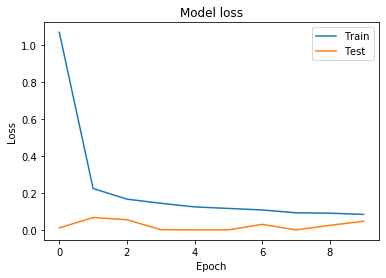

In [88]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [118]:
from keras.preprocessing import image

In [143]:
def open_image(path):
    img = image.load_img(path)
    img2  = image.img_to_array(img)
    img3  = img2.reshape((1,) + img2.shape)
    return img3

In [147]:
img = open_image('D:/mnist/testSet/testSet/img_1.jpg')

In [148]:
img.shape #this shape is (batch,shape)i.e channel first type

(1, 28, 28, 3)

In [150]:
print("Number: ",model.predict_classes(img)[0])

Number:  2
